# Example Notebooks Progress

This notebook uses Github APIs to keep track of progress a team made on an Github repo. It computes the following metrics for each month over the last year:

**Pull requests**
* How many PRs the team created
* How many PRs the team created and accepted
* How many PRs the team helped to merge

**Issues**
* How many Issues the team opened
* How many Issues the team resolved

**Commits**
* How many commits the team made

For each of the category of contribution of the team we also compute its proportional with respect to the total contributions from the community. For example, after we queried the number of PRs made by the team in each month, we also query the number of PRs made by the entire community on the repo. Then we computed the fraction of PRs made by the team over the PRs made by the community. 

In [202]:
from github import Github
github = Github(os.environ['GITHUB_ACCESS_TOKEN'])

# init a repo obj
repo = github.get_repo('aws/amazon-sagemaker-examples')

# get all prs from the repo
pulls = repo.get_pulls(state='all')


In [213]:
# get pulls for this year 
year = 2020
pulls_this_year = [p for p in pulls if p.created_at.year==year]
total_prs = 0
for p in pulls_this_year:
    total_prs+=1
print('Number of PRs created this year:', total_prs)

Number of PRs created this year: 516


In [223]:
# Helper fns
def monthly_stat(stats:List[int], kpi:str) -> None:
    """Plot monthly statistics for the given kpi
    
    metric: A list of integers such that metric[i] is the performance
        of month i. Month 1 means January. Month 0 is a placeholder
    kpi: KPI
    """
    fig, ax = plt.subplots(1,1)
    fig.set_size_inches(10, 10)
    months = range(13)
    
    ax.xaxis.set_ticks(months)
    plt.xlabel('month')
    plt.ylabel(kpi)
    ax.plot(months, stats)
    plt.show()
    return

def get_fraction(team_kpi, total):
    return [float(a)/float(b + 0.01) for a, b in zip(team_kpi, total)]

Put team members' github usernames in the following hash set

In [214]:
# team-markham
team = set(['hsl89', 'TEChopra1000', 'ngluna', 'aaronmarkham',
            'paul-cb', 'aws-rbs', 'easyj2j', 'eslesar-aws',
            'kateglee'
            ])

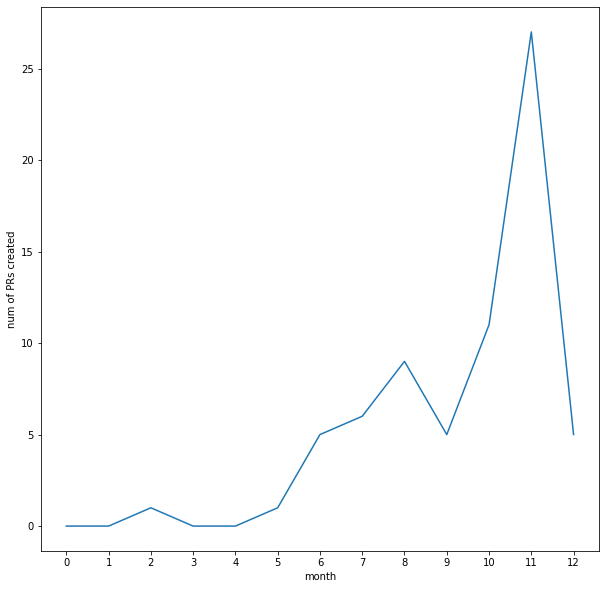

In [216]:
# Number of PRs created by the team
created = [0 for _ in range(13)]
team_pulls = []
for p in pulls_this_year:
    if p.user.login in team:
        team_pulls.append(p)

created = [0 for _ in range(13)]
for p in team_pulls:
    created[p.created_at.month]+=1
monthly_stat(created, 'num of PRs created')

Fraction of PRs created by the team relative to all PRs created.

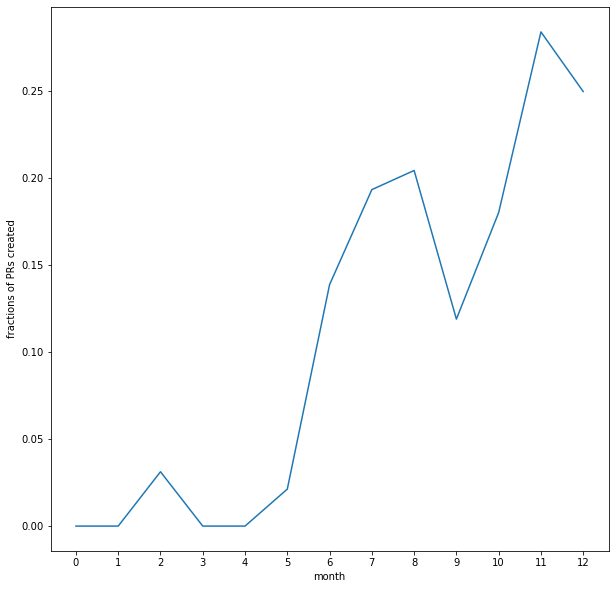

In [221]:
created_total = [0 for _ in range(13)]
for p in pulls_this_year:
    created_total[p.created_at.month]+=1

fraction = get_fraction(created, created_total)
monthly_stat(fraction, 'fractions of PRs created')

## PRs Created by the Team and Accepted

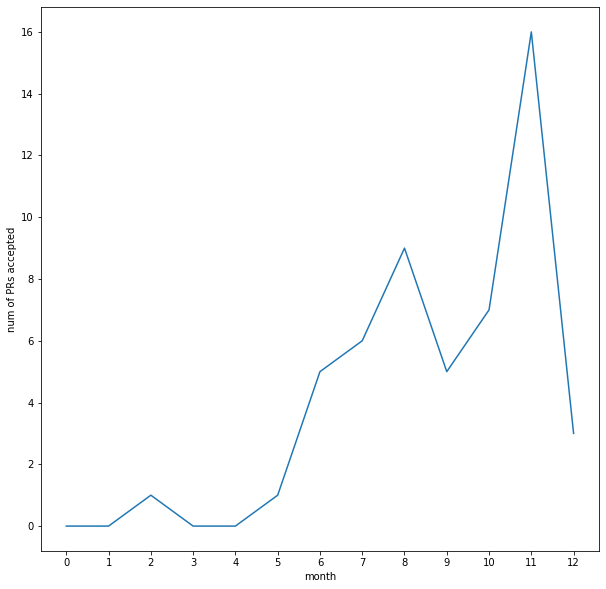

In [222]:
# Number of PRs created by the team and accepted by the community
accepted = [0 for _ in range(13)]
for p in team_pulls:
    if p.merged:
        accepted[p.created_at.month]+=1        
monthly_stat(accepted, 'num of PRs accepted')

## PRs Created by the Team and Accepted (normalized)

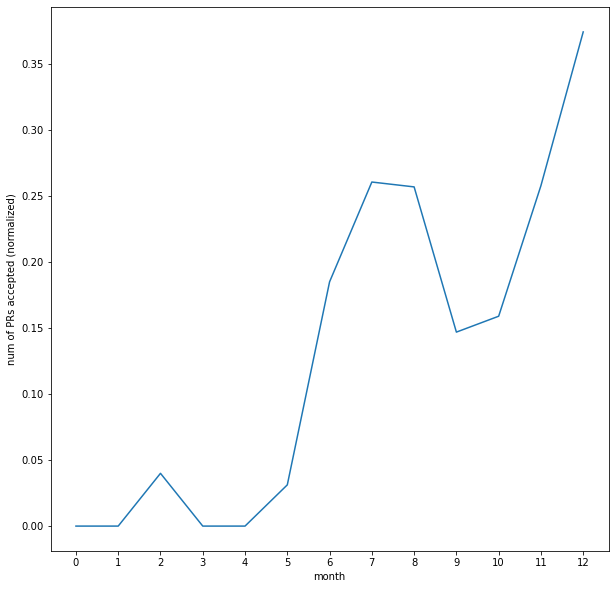

In [224]:
total_accepted = [0 for _ in range(13)]
for p in pulls_this_year:
    if p.merged:
        total_accepted[p.created_at.month]+=1
        
# relative
fraction = get_fraction(accepted, total_accepted)
monthly_stat(fraction, 'num of PRs accepted (normalized)' )

## Number of PRs merged by the team

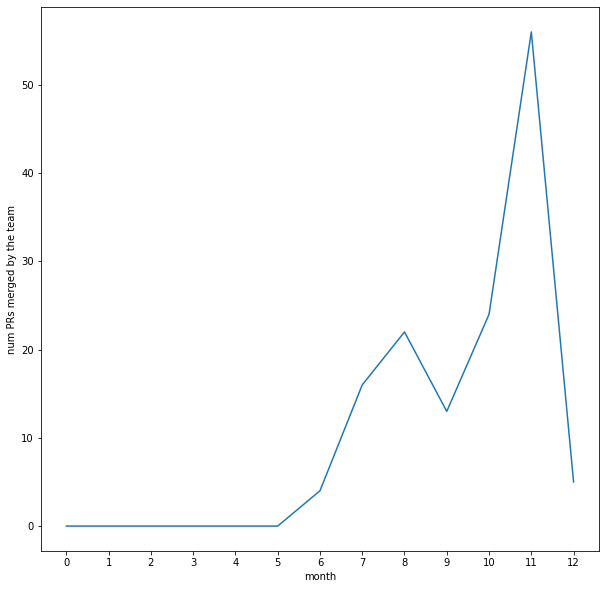

In [182]:
merged_by_team = [0 for i in range(13)]
for p in pulls_this_year:
    if p.merged and p.merged_by.login in team:
        merged_by_team[p.merged_at.month]+=1
monthly_stat(merged_by_team, 'num PRs merged by the team')

## Number of PRs merged by the team (normalized)
It is computed as the number of PRs merged by the team relative to total number of PRs merged. The total number of PRs merged is the same as the total number of PRs accepted computed above. 

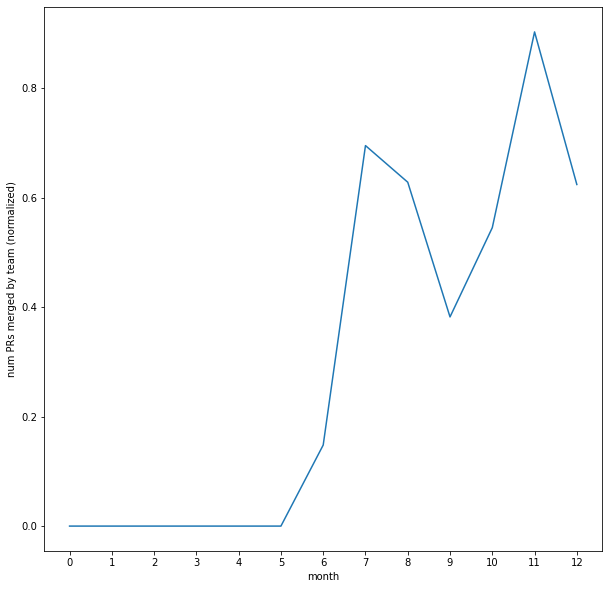

In [225]:
fraction = get_fraction(merged_by_team, total_accepted)
monthly_stat(fraction, 'num PRs merged by team (normalized)')